# Problem No: 1

In [99]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot


In [100]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [101]:
data.shape

(50, 5)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [103]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [104]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [105]:
data.duplicated().sum()

0

In [106]:
# changing columns names
data.rename(columns ={"R&D Spend":"rd_spend",'Marketing Spend': "markenting_spend"}, inplace = True)

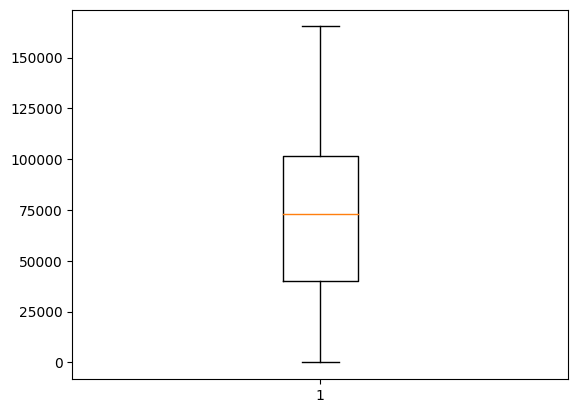

In [107]:
box = plt.boxplot(data['rd_spend'])

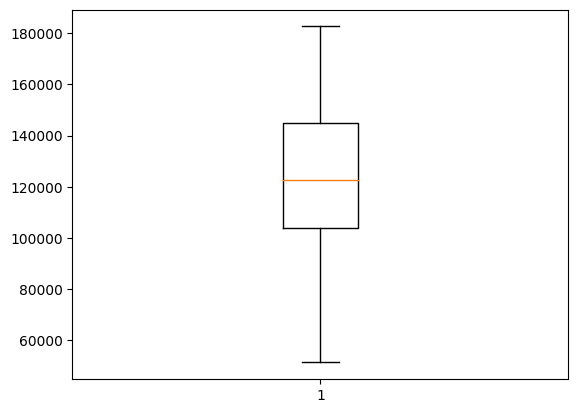

In [108]:
box = plt.boxplot(data['Administration'])

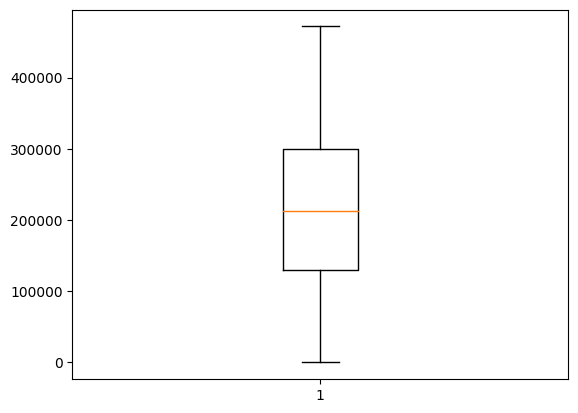

In [109]:
box = plt.boxplot(data['markenting_spend'])


{'whiskers': [<matplotlib.lines.Line2D at 0x26354378340>,
 'caps': [<matplotlib.lines.Line2D at 0x26354378760>,
 'boxes': [<matplotlib.lines.Line2D at 0x263543780a0>],
 'medians': [<matplotlib.lines.Line2D at 0x26354378ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26354378f40>],
 'means': []}

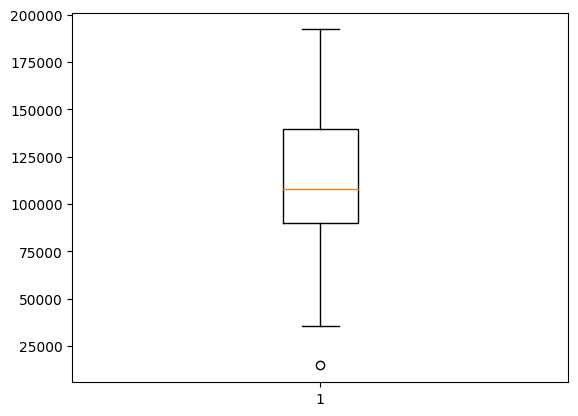

In [110]:
box3 = plt.boxplot(data['Profit'])
box3

In [111]:
#we can use get_ydata of list comprehense method
[item.get_ydata() for item in box3['fliers']]

[array([14681.4])]

In [112]:
data['Profit']<=14681.4

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
Name: Profit, dtype: bool

In [113]:
data.drop(49,axis = 0,inplace = True)

In [114]:
data

,rd_spend,Administration,markenting_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [115]:
data.corr()

,rd_spend,Administration,markenting_spend,Profit
rd_spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
markenting_spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


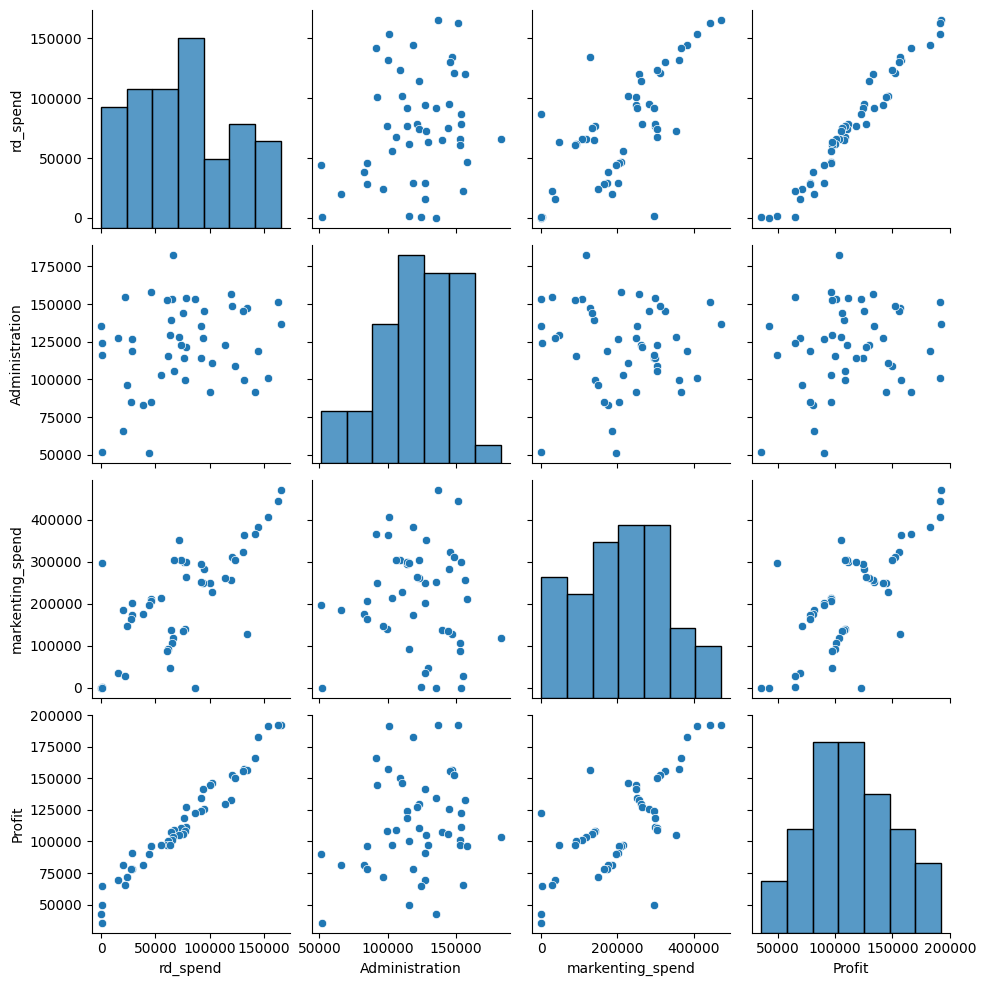

In [116]:
sns.pairplot(data)

In [117]:
model = sm.ols('Profit~rd_spend+Administration+markenting_spend',data= data).fit()

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        22:51:23   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd_spend             0.7830      0.038     20.470      0.000       0.706       0.860
Administration      -0.0222      0.043     -0.518      0.607      -0.109       0.064
markenting_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
#plot  cooks distance to see most influensing point
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

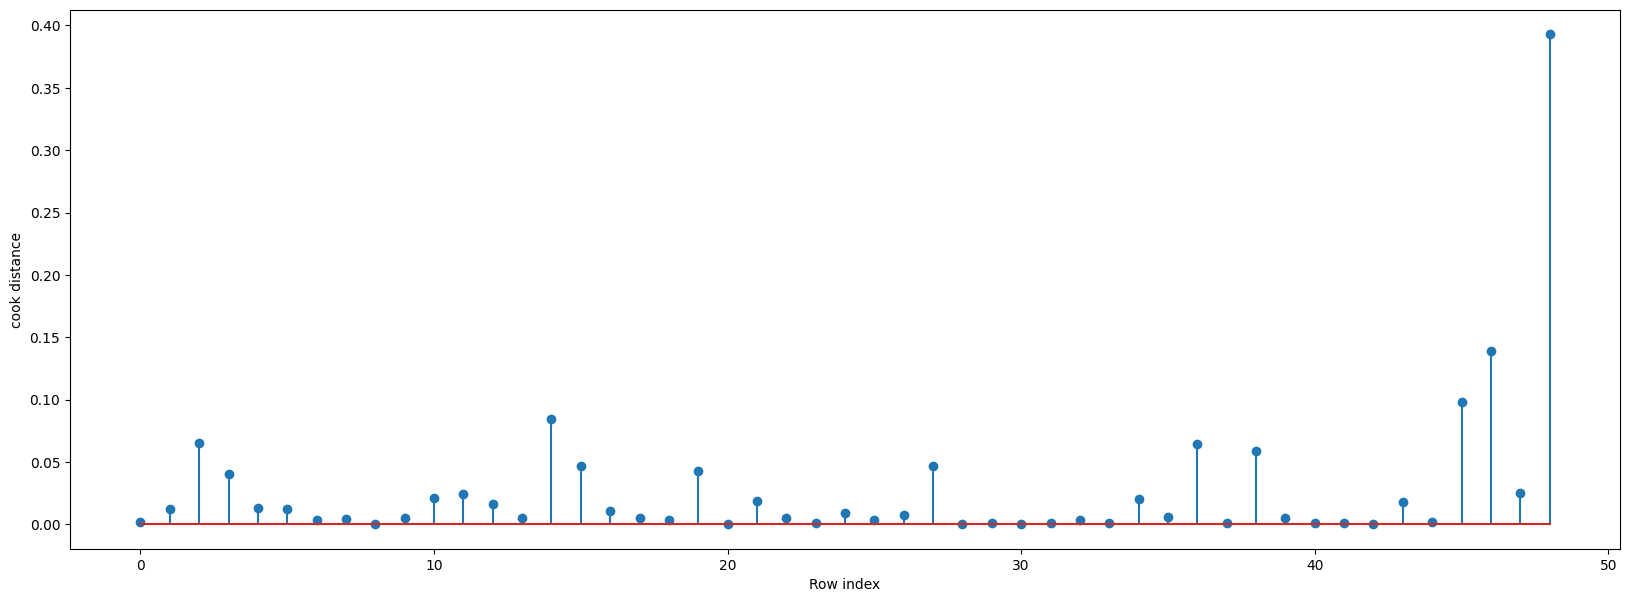

In [120]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("cook distance")
plt.show()

In [121]:
(np.argmax(c),np.max(c))

(48, 0.39274420556321527)

In [122]:
data.drop(48,axis = 0,inplace = True)


In [124]:
data.head()


,rd_spend,Administration,markenting_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [125]:
final_model = sm.ols("Profit~rd_spend+Administration+markenting_spend",data= data).fit()

In [126]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           2.03e-31
Time:                        22:54:13   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rd_spend             0.7895      0.036     21.718      0.000       0.716       0.863
Administration      -0.0633      0.044     -1.442      0.156      -0.152       0.025
markenting_spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Problem No: 2

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
from statsmodels.graphics.regressionplots import influence_plot

In [135]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [137]:
data.shape

(1436, 38)

In [138]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [139]:
data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis = 1,inplace = True)

In [141]:
data.sample(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
509,10900,46,53700,97,1400,5,5,85,1060
338,12750,43,30742,110,1600,3,5,69,1040
487,8950,54,61000,69,2000,5,5,185,1140
415,9950,55,97234,110,1600,5,5,85,1080
113,24950,8,13253,116,2000,5,5,234,1320
1422,7600,78,36000,110,1600,3,5,69,1050
860,9750,63,64690,86,1300,3,5,69,1020
189,7750,43,178858,110,1600,3,5,197,1084
267,12450,34,49291,110,1600,3,5,69,1040
315,13950,41,37533,110,1600,5,5,85,1075


In [143]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [145]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x26359089dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x263588fccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26359089c70>],
 'medians': [<matplotlib.lines.Line2D at 0x26357f87220>],
 'fliers': [<matplotlib.lines.Line2D at 0x26357adc820>],
 'means': []}

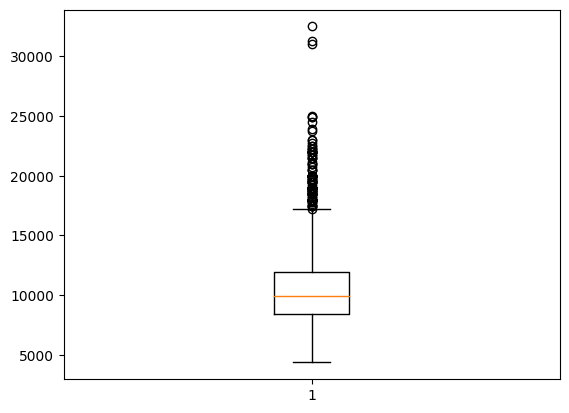

In [146]:
box = plt.boxplot(data['Price'])
box

In [147]:
[item.get_ydata() for item in box['fliers']]


[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 24950, 22950,
        24990, 21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750,
        17950, 18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500,
        24500, 19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900,
        19750, 19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950,
        20950, 20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950,
        18950, 19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795,
        18245, 18950], dtype=int64)]

In [148]:
data[data['Price']>=30000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480


In [149]:
data.drop([109,110,111],axis=0,inplace = True)

In [151]:
data.corr()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.881019,-0.570488,0.314740,0.118685,0.179630,0.067168,0.171866,0.540866
Age_08_04,-0.881019,1.000000,0.501027,-0.152358,-0.093110,-0.143756,-0.006237,-0.176214,-0.458203
KM,-0.570488,0.501027,1.000000,-0.331357,0.106863,-0.032560,0.014549,0.304209,0.000262
HP,0.314740,-0.152358,-0.331357,1.000000,0.033903,0.090554,0.209972,-0.315989,0.079125
cc,0.118685,-0.093110,0.106863,0.033903,1.000000,0.077949,0.014938,0.304685,0.341990
Doors,0.179630,-0.143756,-0.032560,0.090554,0.077949,1.000000,-0.160019,0.101795,0.306349
Gears,0.067168,-0.006237,0.014549,0.209972,0.014938,-0.160019,1.000000,-0.004151,0.024479
Quarterly_Tax,0.171866,-0.176214,0.304209,-0.315989,0.304685,0.101795,-0.004151,1.000000,0.601441
Weight,0.540866,-0.458203,0.000262,0.079125,0.341990,0.306349,0.024479,0.601441,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x26355b5a370>,
 'caps': [<matplotlib.lines.Line2D at 0x26355b63940>,
 'boxes': [<matplotlib.lines.Line2D at 0x26355baf580>],
 'medians': [<matplotlib.lines.Line2D at 0x26355a98670>],
 'fliers': [<matplotlib.lines.Line2D at 0x26355a98b50>],
 'means': []}

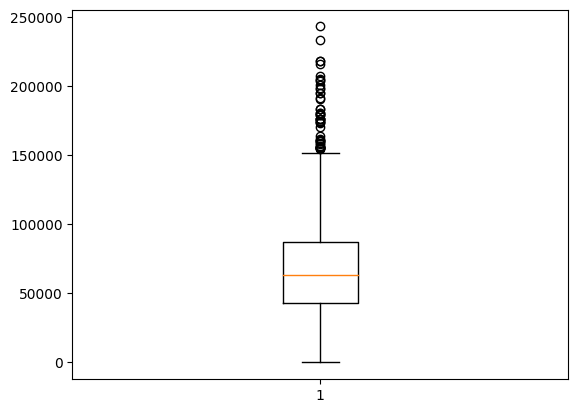

In [152]:
box1 = plt.boxplot(data['KM'])
box1

In [153]:
data[data['KM']>=230000]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
186,6950,43,243000,69,1900,3,5,185,1110
1044,5900,73,232940,72,2000,5,5,40,1172


In [154]:
data.drop([186,1044],axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26359089dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x263588fccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26359089c70>],
 'medians': [<matplotlib.lines.Line2D at 0x26357f87220>],
 'fliers': [<matplotlib.lines.Line2D at 0x26357adc820>],
 'means': []}

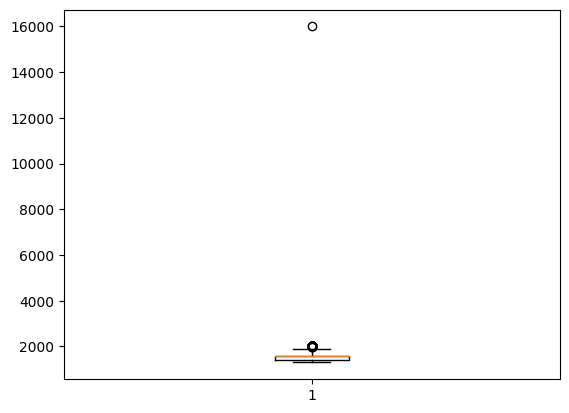

In [155]:
box2 = plt.boxplot(data['cc'])
box


In [156]:
[item.get_ydata() for item in box2['fliers']]


[array([ 2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000, 16000,  2000,  2000,
         2000,  1995,  1995,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  1975,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000], dtype=int64)]

In [157]:
data[data['cc']>=16000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [158]:
data.drop(80, axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26357f7b280>,
 'caps': [<matplotlib.lines.Line2D at 0x26357f7baf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26357fbcb20>],
 'medians': [<matplotlib.lines.Line2D at 0x26357f7bf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x26357f7b0a0>],
 'means': []}

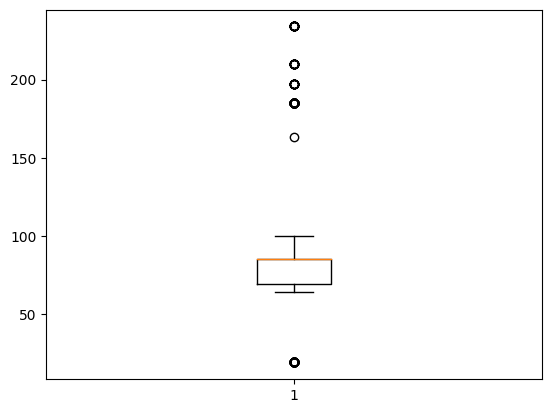

In [159]:
box3 = plt.boxplot(data['Quarterly_Tax'])
box3

In [160]:
[item.get_ydata() for item in box3['fliers']]


[array([ 19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19, 210, 210, 210, 210, 210, 210,
        210, 210, 185, 234, 234, 234, 234, 234, 234, 234, 210, 234, 234,
        234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 210, 210, 197,
        185, 185, 185, 185, 210, 197, 185, 185, 197, 185, 210, 210, 185,
        163, 197, 210, 210, 185, 185, 197, 185, 185, 185, 185, 185, 185,
        185, 197, 185, 185, 185, 210, 185, 185, 185, 185, 185, 185, 197,
        185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185,
        185, 185, 185, 185, 197, 197, 185, 185, 185, 185, 185, 185, 185,
        185, 185, 185, 185, 185, 185, 197, 197, 185

In [162]:
data[data['Quarterly_Tax']<50]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
18,16750,24,25563,110,1600,3,5,19,1065
30,12950,29,9750,97,1400,3,5,19,1100
65,16950,26,32181,110,1600,5,5,19,1075
126,15950,20,36000,110,1600,5,5,19,1075
129,15850,13,33477,110,1600,5,5,19,1075
...,...,...,...,...,...,...,...,...,...
1387,7450,78,52287,110,1600,5,5,19,1114
1388,8750,75,52000,110,1600,5,5,19,1075
1416,8950,79,40093,110,1600,5,5,19,1114
1423,7950,80,35821,86,1300,3,5,19,1015


In [163]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.881824,-0.570948,0.312215,0.147153,0.178857,0.067364,0.173002,0.543217
Age_08_04,-0.881824,1.000000,0.507344,-0.152197,-0.122252,-0.144120,-0.006391,-0.174580,-0.458746
KM,-0.570948,0.507344,1.000000,-0.323599,0.306264,-0.031747,0.015545,0.305482,-0.006662
HP,0.312215,-0.152197,-0.323599,1.000000,0.052671,0.090292,0.210280,-0.315815,0.082772
cc,0.147153,-0.122252,0.306264,0.052671,1.000000,0.122752,0.042162,0.678736,0.659866
Doors,0.178857,-0.144120,-0.031747,0.090292,0.122752,1.000000,-0.160110,0.104625,0.305299
Gears,0.067364,-0.006391,0.015545,0.210280,0.042162,-0.160110,1.000000,-0.004003,0.025057
Quarterly_Tax,0.173002,-0.174580,0.305482,-0.315815,0.678736,0.104625,-0.004003,1.000000,0.604855
Weight,0.543217,-0.458746,-0.006662,0.082772,0.659866,0.305299,0.025057,0.604855,1.000000


In [164]:
data.duplicated().sum()

1

In [165]:
duplicate = data[data.duplicated()]
duplicate

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [166]:
data.drop(113,axis = 0,inplace = True)
data.reset_index()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1424,1431,7500,69,20544,86,1300,3,5,69,1025
1425,1432,10845,72,19000,86,1300,3,5,69,1015
1426,1433,8500,71,17016,86,1300,3,5,69,1015
1427,1434,7250,70,16916,86,1300,3,5,69,1015


In [167]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [168]:
model = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit()


In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1105.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:11:59   Log-Likelihood:                -12266.
No. Observations:                1429   AIC:                         2.455e+04
Df Residuals:                    1420   BIC:                         2.460e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4155.8364   1409.044     -2.949      0.003   -6919.869   -1391.804
Age_08_04      -122.7470      2.565    -47.863      0.000    -127.778    -117.716
KM               -0.0172      0.001    -13.354      0.000      -0.020      -0.015
HP               38.1248      2.898     13.154      0.000      32.439      43.810
cc               -2.1363      0.311     -6.861      0.000      -2.747      -1.525
Doors            -7.2375     38.959     -0.186      0.853     -83.661      69.186
Gears           563.5367    190.709      2.955      0.003     189.435     937.639
Quarterly_Tax     8.0722      1.441      5.603      0.000       5.246      10.898
Weight           17.6120      1.177     14.961      0.000      15.303      19.921
==============================================================================
Omnibus:                      170.912   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1355.018
Skew:                          -0.236   Prob(JB):                    5.77e-295
Kurtosis:                       7.747   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
# doors p value is greater than 0.005 so we plot cook distance for chacking which point is more influence 
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([6.54957610e-03, 3.45887855e-03, 4.66194961e-03, ...,
       2.08577231e-06, 9.20326555e-04, 9.37646088e-03])

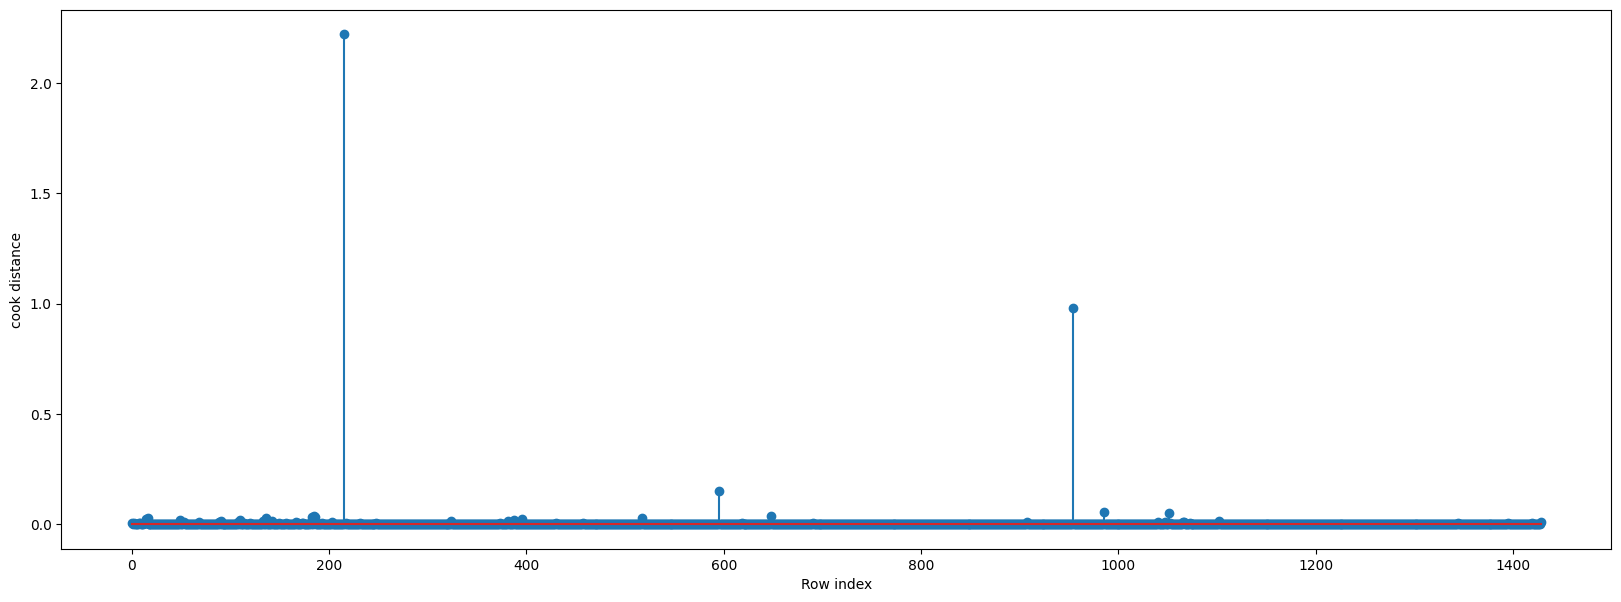

In [171]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("cook distance")
plt.show()

In [172]:
(np.argmax(c),np.max(c))

(215, 2.2207650983698013)

In [173]:
data.drop(215,axis=0,inplace = True)

In [174]:
model1 = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit()


In [175]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1108.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:12:52   Log-Likelihood:                -12256.
No. Observations:                1428   AIC:                         2.453e+04
Df Residuals:                    1419   BIC:                         2.458e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4093.5340   1407.707     -2.908      0.004   -6854.944   -1332.124
Age_08_04      -123.0160      2.565    -47.963      0.000    -128.047    -117.985
KM               -0.0171      0.001    -13.291      0.000      -0.020      -0.015
HP               38.2182      2.895     13.200      0.000      32.539      43.898
cc               -2.1327      0.311     -6.857      0.000      -2.743      -1.523
Doors            -5.0903     38.927     -0.131      0.896     -81.451      71.270
Gears           562.1157    190.486      2.951      0.003     188.450     935.781
Quarterly_Tax     8.0638      1.439      5.604      0.000       5.241      10.887
Weight           17.5490      1.176     14.920      0.000      15.242      19.856
==============================================================================
Omnibus:                      169.980   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.964
Skew:                          -0.232   Prob(JB):                    8.81e-293
Kurtosis:                       7.732   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
model1_influence = model1.get_influence()
(c1,_) = model1_influence.cooks_distance
c1

array([6.56593270e-03, 3.47550451e-03, 4.67081423e-03, ...,
       1.64516548e-06, 9.14058769e-04, 9.34769059e-03])

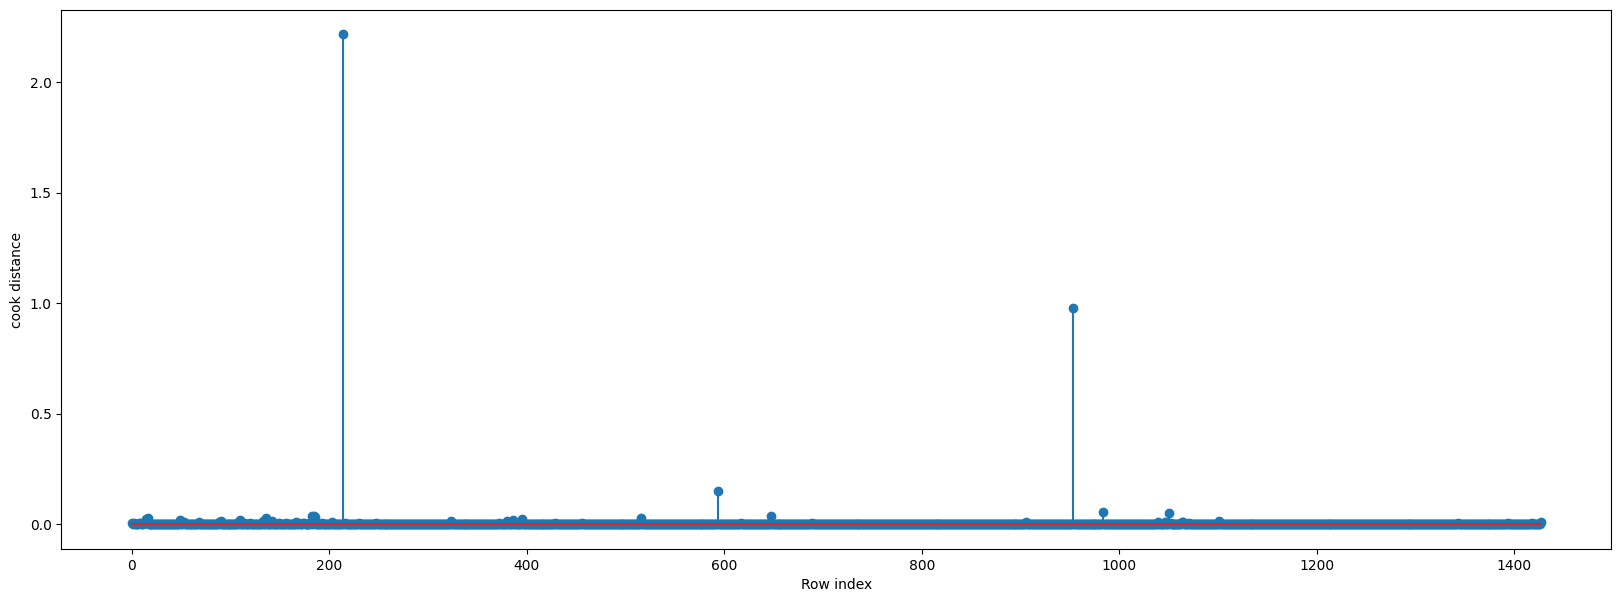

In [178]:

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c1,3))
plt.xlabel("Row index")
plt.ylabel("cook distance")
plt.show()

In [179]:
(np.argmax(c1),np.max(c1))

(214, 2.2159244181276607)

In [180]:
data.drop(214,axis = 0,inplace = True)

In [181]:
model2 = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit()


In [182]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1108.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:13:50   Log-Likelihood:                -12247.
No. Observations:                1427   AIC:                         2.451e+04
Df Residuals:                    1418   BIC:                         2.456e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4087.4434   1407.781     -2.903      0.004   -6849.001   -1325.886
Age_08_04      -123.0433      2.565    -47.969      0.000    -128.075    -118.012
KM               -0.0171      0.001    -13.299      0.000      -0.020      -0.015
HP               38.2220      2.895     13.201      0.000      32.542      43.902
cc               -2.1297      0.311     -6.847      0.000      -2.740      -1.520
Doors            -6.5926     38.962     -0.169      0.866     -83.021      69.836
Gears           560.1282    190.506      2.940      0.003     186.424     933.833
Quarterly_Tax     8.1242      1.441      5.640      0.000       5.298      10.950
Weight           17.5517      1.176     14.921      0.000      15.244      19.859
==============================================================================
Omnibus:                      170.439   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1349.383
Skew:                          -0.235   Prob(JB):                    9.67e-294
Kurtosis:                       7.741   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
data.drop("Doors",axis = 1,inplace = True)


In [184]:
model3 = sn.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data = data).fit()


In [185]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:14:25   Log-Likelihood:                -12247.
No. Observations:                1427   AIC:                         2.451e+04
Df Residuals:                    1419   BIC:                         2.455e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4089.6645   1407.238     -2.906      0.004   -6850.155   -1329.174
Age_08_04      -123.0482      2.564    -47.990      0.000    -128.078    -118.019
KM               -0.0171      0.001    -13.325      0.000      -0.020      -0.015
HP               38.1735      2.880     13.254      0.000      32.524      43.823
cc               -2.1245      0.309     -6.866      0.000      -2.731      -1.518
Gears           566.4329    186.763      3.033      0.002     200.072     932.794
Quarterly_Tax     8.1280      1.440      5.645      0.000       5.304      10.953
Weight           17.4970      1.131     15.477      0.000      15.279      19.715
==============================================================================
Omnibus:                      169.095   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1328.877
Skew:                          -0.231   Prob(JB):                    2.74e-289
Kurtosis:                       7.705   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-----------------------